Q1. Consider the Amazon Alexa Reviews Dataset. This dataset consists
of a nearly 3000 Amazon customer reviews (input text), star
ratings, date of review, variant and feedback of various amazon
Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.
Perform following operations on this dataset.

In [1]:
# Natural Language Toolkit, is a Python package that you can use for NLP
import nltk
#punkt is the required package for tokenization.
nltk.download('punkt')

# General
import numpy as np
import pandas as pd
import re

# Data Exploration
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df=pd.read_csv("AmazonAlexa_Reviews - AmazonAlexa_Reviews.csv")
print(df)

      rating       date        variation  \
0          5  31-Jul-18  Charcoal Fabric   
1          5  31-Jul-18  Charcoal Fabric   
2          4  31-Jul-18    Walnut Finish   
3          5  31-Jul-18  Charcoal Fabric   
4          5  31-Jul-18  Charcoal Fabric   
...      ...        ...              ...   
3145       5  30-Jul-18       Black  Dot   
3146       5  30-Jul-18       Black  Dot   
3147       5  30-Jul-18       Black  Dot   
3148       5  30-Jul-18       White  Dot   
3149       4  29-Jul-18       Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       .

Q. (i) Plot a graph of Positive and Negative Feedback (1 = Positive
       Feedback, 0 = Negative Feedback)

In [3]:
#NLTK provides two methods for tokenization : 
df['no_of_chars'] = df['verified_reviews'].astype(str).str.len()

#nltk.word_tokenize() to divide given text to word and 
df['no_of_words'] = df['verified_reviews'].astype(str).apply(lambda x: len(nltk.word_tokenize(x)))

#nltk.sent_tokenize() to divide given text at sentence level.
df['no_of_sents'] = df['verified_reviews'].astype(str).apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()


,rating,date,variation,verified_reviews,feedback,no_of_chars,no_of_words,no_of_sents
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,4,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,3,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,41,2
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,38,3
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,1


In [4]:
import plotly.graph_objects as go
#plot bar graph 
temp = pd.DataFrame()
temp['Label'] = ['Negative','Positive']
temp['Count'] = [len(df[df['feedback'] == 0]), len(df[df['feedback'] == 1])]
temp = temp.sort_values(by = ['Count'], ascending = False)
fig = px.bar(temp, x = 'Label', y = 'Count', 
 color = "Label", text_auto='', width = 600, 
 color_discrete_sequence = ["#AB63FA", "orange"],
 template = 'plotly_dark',
 title = "Count Plot")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig_widget = go.FigureWidget(fig)
fig_widget


FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'cliponaxis': False,
              'hover…

In [5]:
#plot the pie chart
fig = px.pie(temp, values = 'Count', names = 'Label', width = 600, 
 color = 'Label', color_discrete_map = {'Negative': 'rgb(228, 26, 28)', 'Positive':'blue'} ,
 template = 'plotly_dark', title = "Pie Chart")
fig_widget = go.FigureWidget(fig)
fig_widget




FigureWidget({
    'data': [{'customdata': array([['Positive'],
                                   ['Negative'…

In [6]:
#plot fistogram
fig = px.histogram(df, x = 'no_of_words', color = 'feedback', 
 template = 'plotly_dark', 
 title = "Histogram for Negative vs Positive based on Number of Characters per message" )
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig_widget = go.FigureWidget(fig)
fig_widget


FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemp…

In [7]:
#scatter plot
fig = px.scatter_matrix(df, dimensions=["no_of_chars", "no_of_words", "no_of_sents"], 
 color = "feedback", template = 'plotly_dark', 
 color_discrete_map = {'Negative': '#19D3F3', 'Positive': '#FF9900'},
 title = "Pair Plot")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'dimensions': [{'axis': {'matches': True},
                              'label':…

In [8]:
fig = px.imshow(df.corr(),text_auto = True, template = 'plotly_dark', title = "Correlation Matrix")
fig_widget = go.FigureWidget(fig)
fig_widget


FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>c…

Q. (ii) Plot the graph of Ratings distribution.

Text(0.5, 1.0, 'Rating')

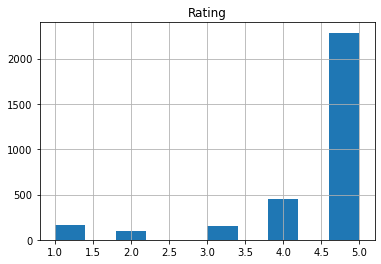

In [9]:
#plot the histogram for rating
df['rating'].hist(bins=10)
plt.title('Rating')


<AxesSubplot:xlabel='rating', ylabel='Count'>

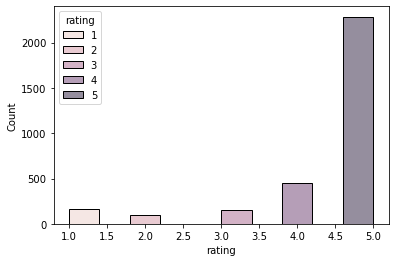

In [10]:
x1 = df
sns.histplot(x1,x = 'rating',hue = 'rating', bins =10)


In [11]:
df.head()

,rating,date,variation,verified_reviews,feedback,no_of_chars,no_of_words,no_of_sents
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,4,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,3,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,41,2
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,38,3
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,1


Q. (iii) Convert the review text into lowercase

In [12]:
review = df.drop(['rating','feedback','date','variation','feedback','no_of_chars','no_of_words','no_of_sents'],axis=1)

In [13]:
review

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [14]:
#convert review in str type the use the function lower
review_lower = review.apply(lambda x :x.astype(str).str.lower())
review_lower


,verified_reviews
0,love my echo!
1,loved it!
2,"sometimes while playing a game, you can answer..."
3,i have had a lot of fun with this thing. my 4 ...
4,music
...,...
3145,"perfect for kids, adults and everyone in betwe..."
3146,"listening to music, searching locations, check..."
3147,"i do love these things, i have them running my..."
3148,only complaint i have is that the sound qualit...


Q. (iv) Remove all punctuations from review text.

In [15]:
df['new_text'] = review_lower


In [16]:
#the are the punctuation
import string
string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#defining the function to remove punctuation
def remove_punctuation(text):
 punctuationfree="".join([i for i in text if i not in string.punctuation])
 return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['new_text'].apply(lambda text: remove_punctuation(text))

In [18]:
df['clean_msg']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: clean_msg, Length: 3150, dtype: object

Q. (v) Remove emoticons and emojis from the text

In [19]:
#remove the emoji
def remove_emoji(review):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',review)
review

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [20]:
EMOTICONS=[':-<',':->']
def remove_emoticons(text):
 emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
 return emoticon_pattern.sub(r'', text)
df['clean_emoji']= df['clean_msg'].apply(lambda text: remove_emoji(text))
remove_emoticons("Hello.Good Morning, Have a nice day :->")


'Hello.Good Morning, Have a nice day '

Q. (vi) Tokenize the review text into words.

In [21]:
#defining function for tokenization
import re
def tokenization(text):
 tokens = re.split('W+',text)
 return tokens
#applying function to the column
df['msg_tokenied']= df['clean_emoji'].apply(lambda x: tokenization(x))

In [22]:
df['msg_tokenied'].head()

0                                       [love my echo]
1                                           [loved it]
2    [sometimes while playing a game you can answer...
3    [i have had a lot of fun with this thing my 4 ...
4                                              [music]
Name: msg_tokenied, dtype: object

Q. (vii) Remove the Stopwords from the tokenized text.

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [24]:
#removing th stop words
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  """custom function to remove the stopwords"""
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["text_wo_stop"] = df["msg_tokenied"].apply(lambda text: remove_stopwords(text))
df.head()


,rating,date,variation,verified_reviews,feedback,no_of_chars,no_of_words,no_of_sents,new_text,clean_msg,clean_emoji,msg_tokenied,text_wo_stop
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,4,1,love my echo!,love my echo,love my echo,[love my echo],['love echo']
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,3,1,loved it!,loved it,loved it,[loved it],['loved it']
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,41,2,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,[sometimes while playing a game you can answer...,['sometimes playing game answer question corre...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,38,3,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,[i have had a lot of fun with this thing my 4 ...,['i lot fun thing 4 yr old learns dinosaurs co...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,1,music,music,music,[music],['music']


Q. (viii) Perform stemming & lemmatization on the review text.

In [25]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
     return " ".join([stemmer.stem(word) for word in text.split()])
df["text_stemmed"] = df["verified_reviews"].astype(str).apply(lambda text: stem_words(text))
df["text_stemmed"]


0                                           love my echo!
1                                                love it!
2       sometim while play a game, you can answer a qu...
3       i have had a lot of fun with thi thing. my 4 y...
4                                                   music
                              ...                        
3145     perfect for kids, adult and everyon in between!!
3146    listen to music, search locations, check time,...
3147    i do love these things, i have them run my ent...
3148    onli complaint i have is that the sound qualit...
3149                                                 good
Name: text_stemmed, Length: 3150, dtype: object

Q. (ix) Perform the word vectorization on review text using Bag of
Words technique.

In [28]:
#count the frequency of each word
word2count = {}
for data in df['text_wo_stop']:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

word2count

{'[': 3150,
 "'love": 309,
 'echo': 812,
 "'": 3787,
 ']': 3150,
 "'loved": 9,
 'it': 373,
 "'sometimes": 1,
 'playing': 69,
 'game': 2,
 'answer': 32,
 'question': 15,
 'correctly': 10,
 'alexa': 567,
 'says': 25,
 'got': 115,
 'wrong': 15,
 'answers': 19,
 'like': 482,
 'able': 106,
 'turn': 93,
 'lights': 94,
 'away': 29,
 'home': 211,
 'i': 708,
 'lot': 77,
 'fun': 130,
 'thing': 127,
 '4': 30,
 'yr': 3,
 'old': 49,
 'learns': 8,
 'dinosaurs': 1,
 'control': 75,
 'play': 214,
 'games': 29,
 'categories': 1,
 'nice': 81,
 'sound': 321,
 'music': 519,
 'well': 158,
 "'music": 5,
 'received': 19,
 'gift': 48,
 'needed': 27,
 'another': 82,
 'bluetooth': 56,
 'something': 49,
 'easily': 29,
 'accessible': 2,
 'found': 26,
 'smart': 180,
 'speaker': 230,
 'can': 48,
 '’': 506,
 't': 217,
 'wait': 17,
 'see': 88,
 'else': 29,
 'do': 22,
 "'without": 2,
 'cellphone': 2,
 'not': 27,
 'use': 457,
 'many': 85,
 'features': 65,
 'ipad': 4,
 'great': 565,
 'alarm': 102,
 'u': 12,
 'r': 2,
 'al

In [29]:
#most frequent 100 words
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

["'",
 '[',
 ']',
 'echo',
 'i',
 'love',
 'alexa',
 'great',
 'music',
 '’',
 'like',
 'use',
 'it',
 'one',
 'sound',
 "'love",
 'set',
 'dot',
 'easy',
 'amazon',
 'product',
 'get',
 'good',
 'speaker',
 'works',
 't',
 'would',
 'play',
 'home',
 'device',
 'time',
 'smart',
 'really',
 'still',
 'new',
 'better',
 'much',
 'also',
 'quality',
 'bought',
 'prime',
 'well',
 's',
 'work',
 "'great",
 'day',
 "'works",
 'show',
 'far',
 'things',
 'even',
 'devices',
 'fun',
 'im',
 'thing',
 'room',
 'tv',
 'plus',
 "'it",
 'got',
 'house',
 "'the",
 'screen',
 'everything',
 "'this",
 'learning',
 'ask',
 'little',
 'dont',
 'able',
 'need',
 'buy',
 'alarm',
 'weather',
 'want',
 'could',
 'voice',
 'spot',
 'using',
 'clock',
 'hub',
 'lights',
 'know',
 'turn',
 'video',
 'price',
 'see',
 'used',
 'many',
 "'we",
 'getting',
 'think',
 'purchase',
 'phone',
 'another',
 'setup',
 "'very",
 'nice',
 'bedroom',
 'm']

In [30]:
#frequency of each word
def df_word(df_txt):
    vocabulary = []
    for txt in df_txt.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame(list(ct.items()), columns=['word', 'count'])
    dfword.sort_values(by='count', ascending=False, inplace=True)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df['text_wo_stop'])
dfword.head(6)

Vocabulary Size: 5412


,word,count
0,echo,779
1,love,635
2,['i,608
3,alexa,524
4,like,480
5,music,478


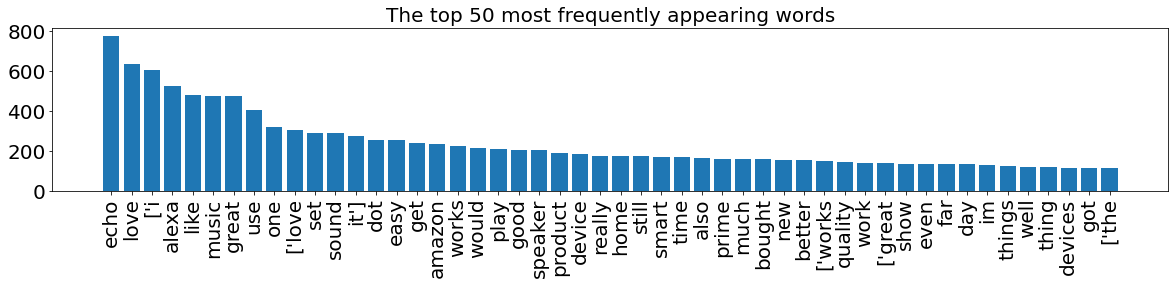

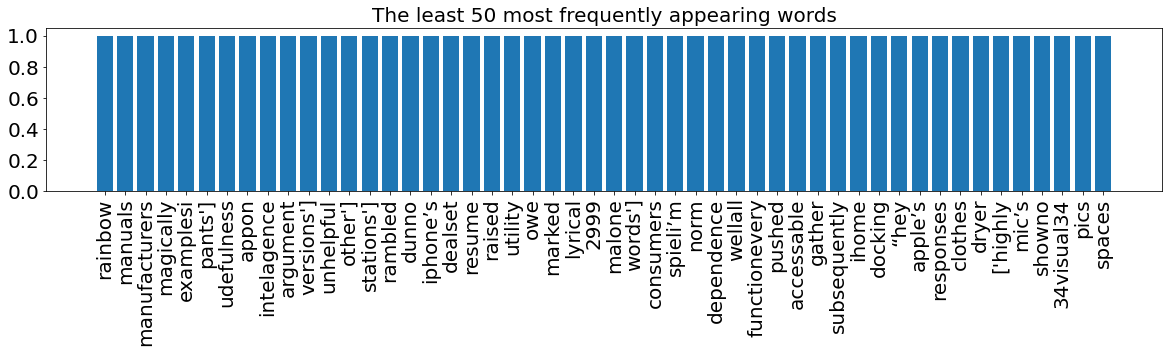

In [31]:
#most and least frequent 50 words
topn = 50
def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],title="The least 50 most frequently appearing words")

In [32]:
#print the vector
X = []
for data in df['text_wo_stop']:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

In [33]:
X

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

Q. (x) Create representation of Review Text by calculating Term
       Frequency and Inverse Document Frequency (TF-IDF)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
#tf idf object
tf_idf = TfidfVectorizer()
#applying tf idf to data
data_tf = tf_idf.fit_transform(df['text_wo_stop'])

In [36]:
print("n_samples: %d, n_features: %d" % data_tf.shape)

n_samples: 3150, n_features: 4451


In [37]:
# get indexing
print('\nWord indexes:')
print(tf_idf.vocabulary_)


Word indexes:
{'love': 2377, 'echo': 1302, 'loved': 2378, 'it': 2136, 'sometimes': 3611, 'playing': 2912, 'game': 1675, 'answer': 339, 'question': 3086, 'correctly': 971, 'alexa': 269, 'says': 3367, 'got': 1744, 'wrong': 4408, 'answers': 342, 'like': 2300, 'able': 144, 'turn': 4081, 'lights': 2296, 'away': 458, 'home': 1912, 'lot': 2370, 'fun': 1650, 'thing': 3947, 'yr': 4441, 'old': 2698, 'learns': 2265, 'dinosaurs': 1174, 'control': 943, 'play': 2909, 'games': 1676, 'categories': 721, 'nice': 2620, 'sound': 3634, 'music': 2551, 'well': 4322, 'received': 3153, 'gift': 1710, 'needed': 2592, 'another': 338, 'bluetooth': 577, 'something': 3609, 'easily': 1298, 'accessible': 155, 'found': 1626, 'smart': 3570, 'speaker': 3661, 'can': 690, 'wait': 4261, 'see': 3415, 'else': 1345, 'do': 1227, 'without': 4370, 'cellphone': 734, 'cannot': 696, 'use': 4179, 'many': 2430, 'features': 1539, 'ipad': 2116, 'great': 1766, 'alarm': 259, 'almost': 291, 'deaf': 1064, 'hear': 1859, 'bedroom': 515, 'liv

In [38]:
# display tf-idf values
#(0,1302) i.e documnent index and word index resp
print('\ntf-idf values:')
print(data_tf)


tf-idf values:
  (0, 1302)	0.7528252013073014
  (0, 2377)	0.6582204921427327
  (1, 2136)	0.48294177997118604
  (1, 2378)	0.8756524636853725
  (2, 1912)	0.17509811689042984
  (2, 458)	0.25748874949140105
  (2, 2296)	0.20828082067265302
  (2, 4081)	0.2132847573359621
  (2, 144)	0.1996780521988858
  (2, 2300)	0.13500670170880683
  (2, 342)	0.2743084435021711
  (2, 4408)	0.28440955861049194
  (2, 1744)	0.18923005922110586
  (2, 3367)	0.2624319110185398
  (2, 269)	0.13266914799746615
  (2, 971)	0.3013709345536939
  (2, 3086)	0.28440955861049194
  (2, 339)	0.2544698083363656
  (2, 1675)	0.36018601974744935
  (2, 2912)	0.22382894946086399
  (2, 3611)	0.2477009044254448
  (3, 4322)	0.1787119076902448
  (3, 2551)	0.12968404930938252
  (3, 3634)	0.147356491206744
  (3, 2620)	0.20031047096145563
  :	:
  (3148, 2201)	0.18467603147817352
  (3148, 3854)	0.16549551849063213
  (3148, 1922)	0.17937145176649044
  (3148, 1254)	0.21177258187260112
  (3148, 1643)	0.1584074221639605
  (3148, 1637)	0.182798